In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import librosa
import os

In [22]:
SAMPLE_RATE = 48000
SEGMENT_DURATION = int(1 * SAMPLE_RATE)
OVERLAP_DURATION = int(0.5 * SAMPLE_RATE)

In [23]:
# Ubah ini aja
dir_data_xc = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"

In [24]:
def load_and_plot(path, list_result):
    file_name = os.path.basename(path)
    audio, sr = librosa.load(path, sr=SAMPLE_RATE)
    time_axis = np.linspace(0, len(audio) / sr, len(audio))

    plt.figure(figsize=(20, 4))
    plt.plot(time_axis, audio, label="Amplitude")
    # plt.title(f"Audio waveform with loud segments marked - {file_name}") 
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    for i in enumerate(list_result):
        start_time = i[1][0]
        end_time = i[1][1]
        plt.axvspan(start_time, end_time, color='green', alpha=0.3)

    plt.xticks(np.arange(0, 25.1, 0.5))
    plt.grid(which='both', alpha=0.5)
    plt.xlim(0, 25)
    plt.ylim(-1, 1)
    plt.tight_layout()
    plt.legend()
    plt.show()

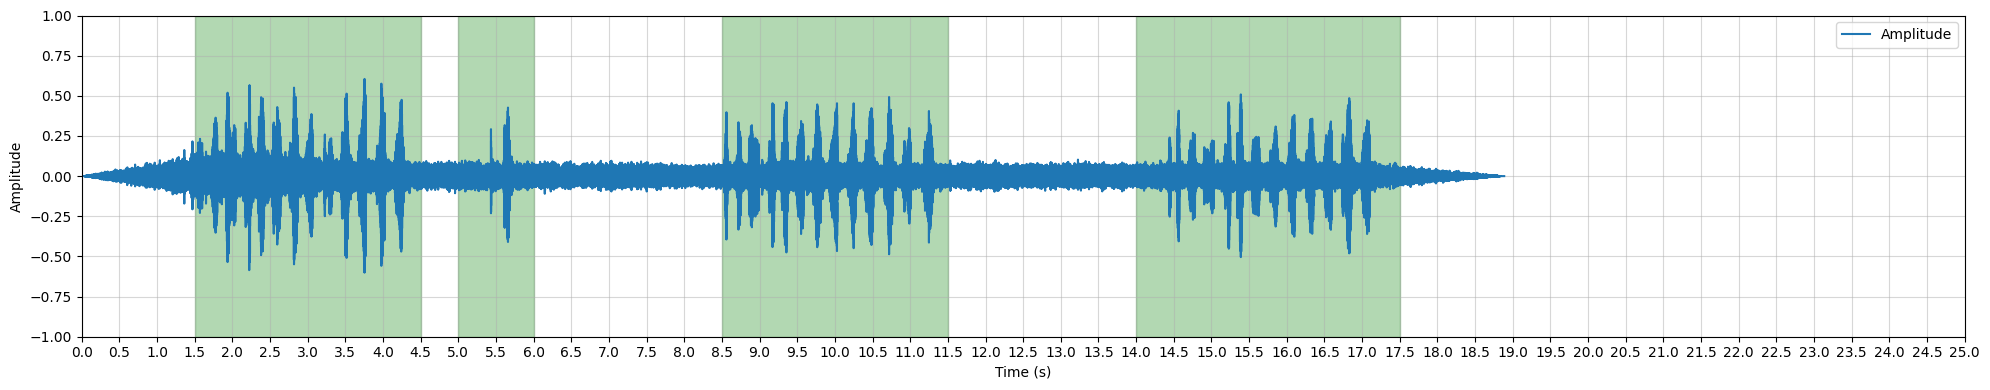

In [25]:
load_and_plot(dir_data_xc+"/19655.mp3",[[1.5, 4.5], [5.0, 6.0], [8.5, 11.5], [14.0, 17.5]])

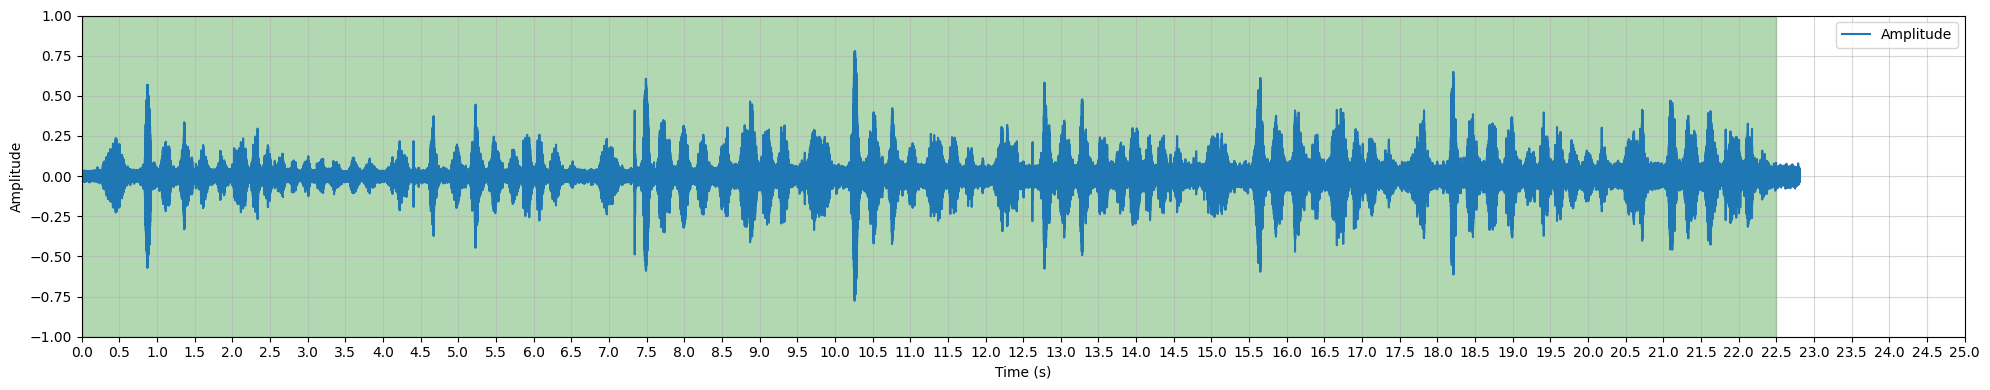

In [26]:
load_and_plot(dir_data_xc+"/90809.mp3",[[0.0, 22.5]])

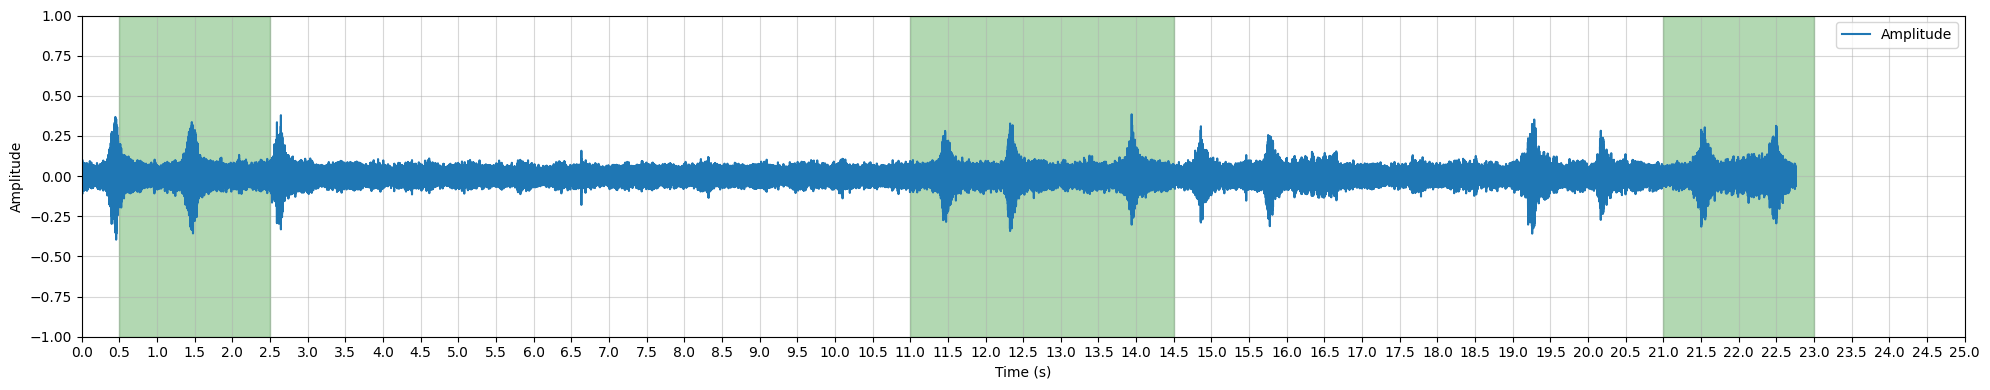

In [27]:
load_and_plot(dir_data_xc+"/151761.mp3", [[0.5, 2.5], [11.0, 14.5], [21.0, 23.0]])

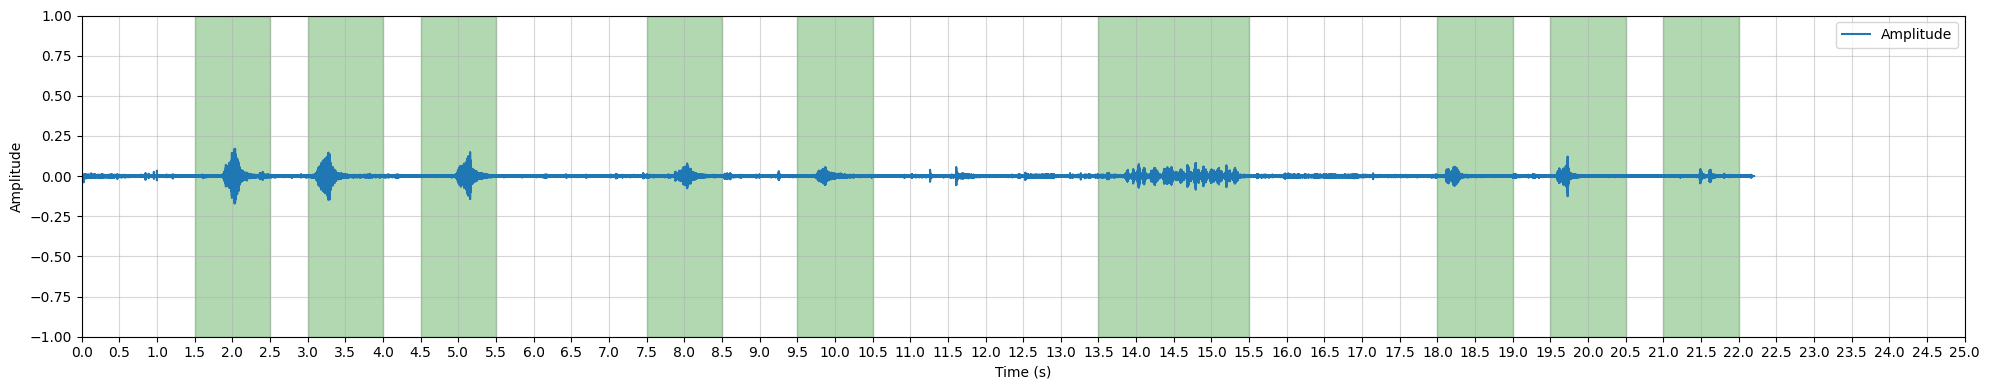

In [28]:
load_and_plot(dir_data_xc+"/193835.mp3",[[1.5, 2.5], [3.0, 4.0], [4.5, 5.5], [7.5, 8.5], [9.5, 10.5], [13.5, 15.5], [18.0, 19.0], [19.5, 20.5], [21.0, 22.0]])

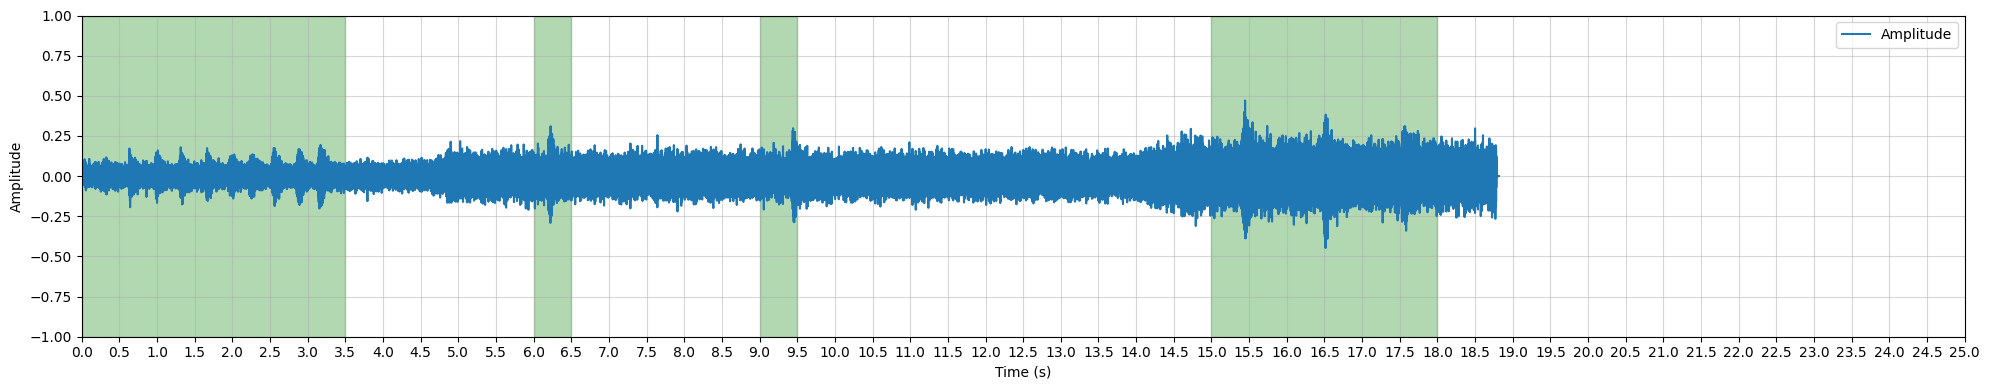

In [29]:
load_and_plot(dir_data_xc+"/279210.mp3",[[0.0, 3.5], [6.0, 6.5], [9.0, 9.5], [15.0, 18.0]])

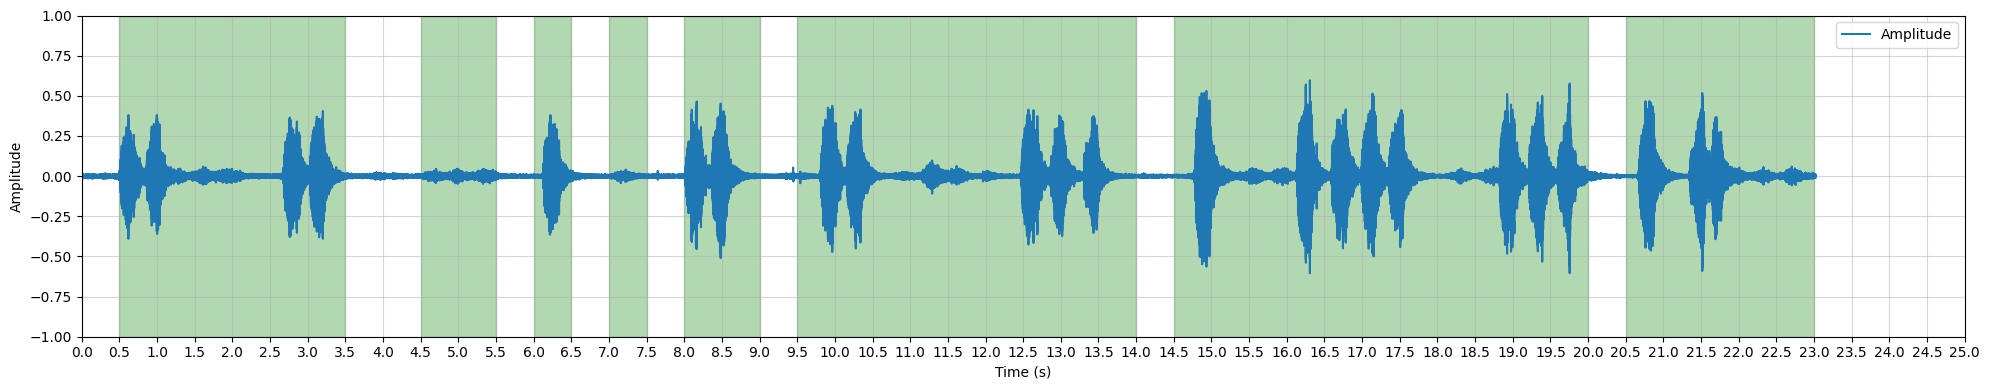

In [30]:
load_and_plot(dir_data_xc+"/282469.mp3",[[0.5, 3.5], [4.5, 5.5], [6.0, 6.5], [7.0, 7.5], [8.0, 9.0], [9.5, 14.0], [14.5, 20.0], [20.5, 23.0]])

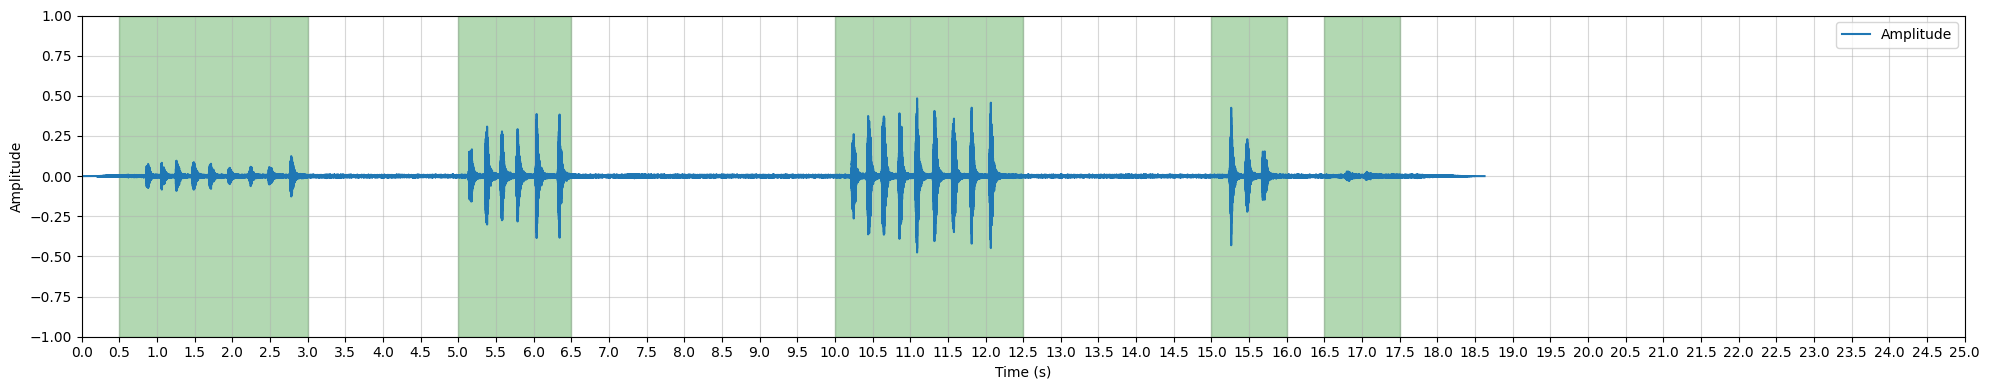

In [31]:
load_and_plot(dir_data_xc+"/359523.mp3",[[0.5, 3.0], [5.0, 6.5], [10.0, 12.5], [15.0, 16.0], [16.5, 17.5]])

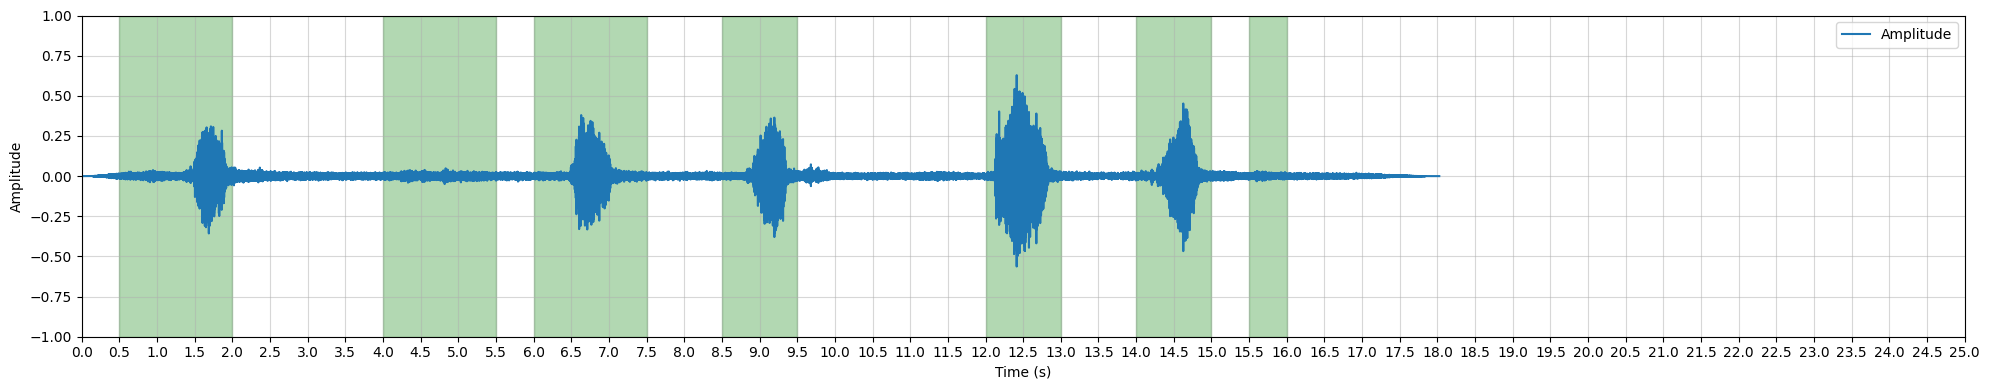

In [32]:
load_and_plot(dir_data_xc+"/359552.mp3",[[0.5, 2.0], [4.0, 5.5], [6.0, 7.5], [8.5, 9.5], [12.0, 13.0], [14.0, 15.0], [15.5, 16.0]])

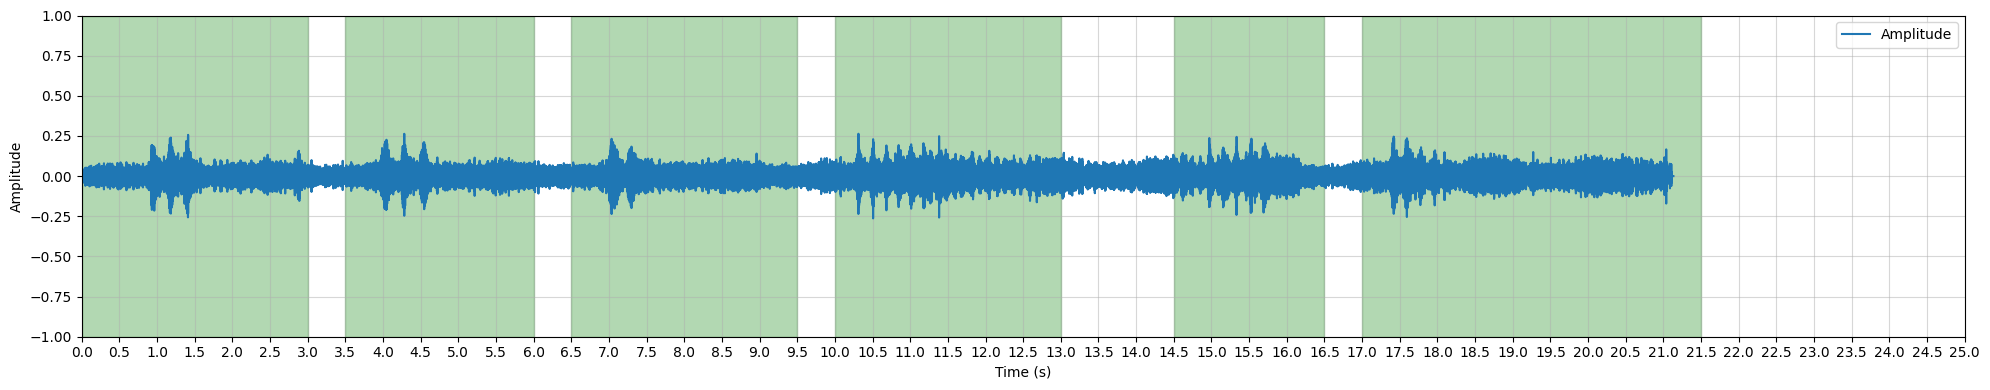

In [33]:
load_and_plot(dir_data_xc+"/498380.mp3",[[0.0, 3.0], [3.5, 6.0], [6.5, 9.5], [10.0, 13.0], [14.5, 16.5], [17.0, 21.5]])

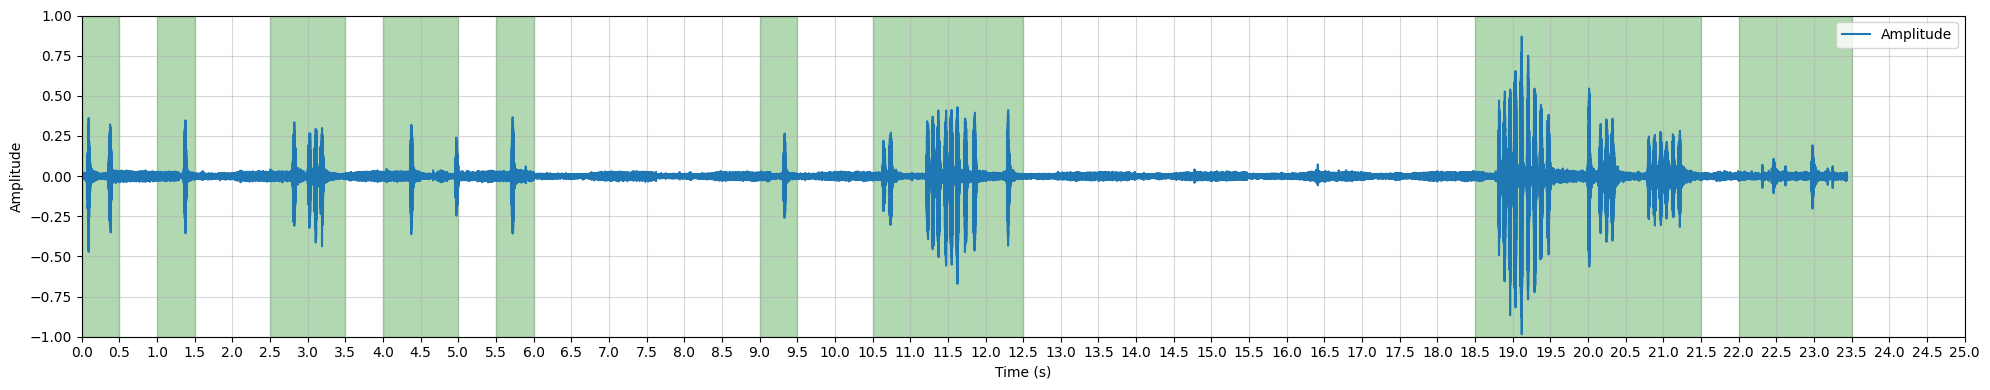

In [34]:
load_and_plot(dir_data_xc+"/505545.mp3",[[0.0, 0.5], [1.0, 1.5], [2.5, 3.5], [4.0, 5.0], [5.5, 6.0], [9.0, 9.5], [10.5, 12.5], [18.5, 21.5], [22.0, 23.5]])

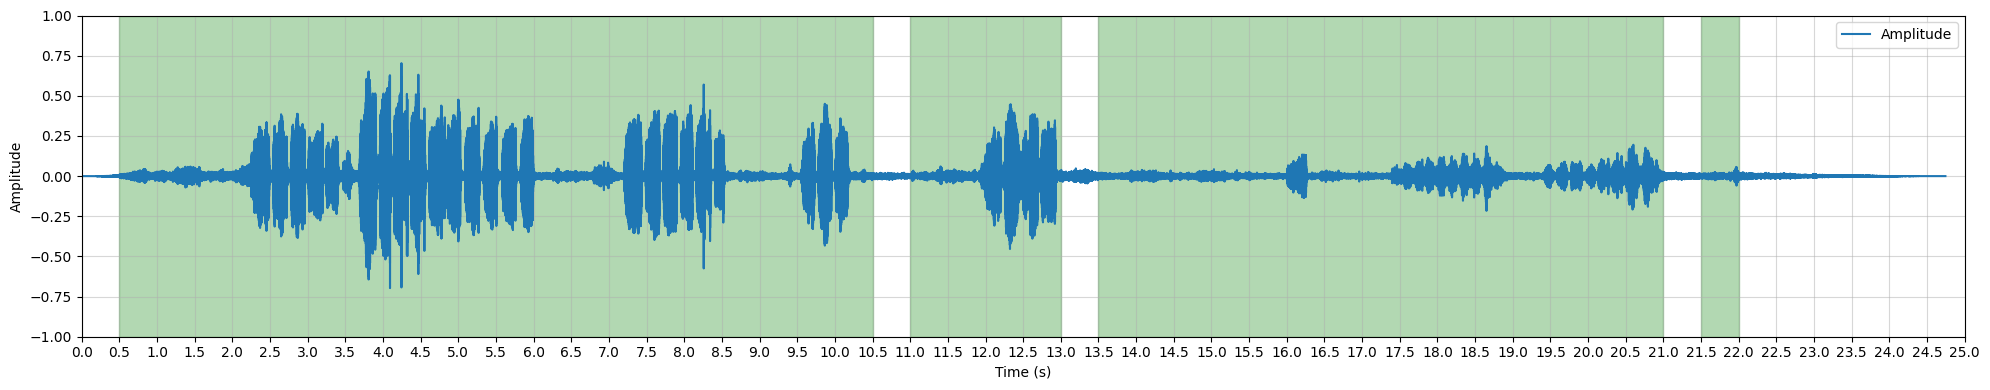

In [35]:
load_and_plot(dir_data_xc+"/531042.mp3",[[0.5, 10.5], [11.0, 13.0], [13.5, 21.0], [21.5, 22.0]])

In [36]:
def label_to_segments(list_label):
    segments = []
    for label in list_label:
        start, end = label
        if end - start == 1:
            segments.append([start, end])
        else:
            current = start
            while current + 1 <= end:
                segments.append([current, current + 1])
                current += 0.5
    return segments

In [37]:
list_label_xc = [
    ["19655.mp3", [[1.5, 4.5], [5.0, 6.0], [8.5, 11.5], [14.0, 17.5]]],
    ["90809.mp3", [[0.0, 22.5]]],
    ["151761.mp3", [[0.5, 2.5], [11.0, 14.5], [21.0, 23.0]]],
    ["193835.mp3", [[1.5, 2.5], [3.0, 4.0], [4.5, 5.5], [7.5, 8.5], [9.5, 10.5], [13.5, 15.5], [18.0, 19.0], [19.5, 20.5], [21.0, 22.0]]],
    ["279210.mp3", [[0.0, 3.5], [6.0, 6.5], [9.0, 9.5], [15.0, 18.0]]],
    ["282469.mp3", [[0.5, 3.5], [4.5, 5.5], [6.0, 6.5], [7.0, 7.5], [8.0, 9.0], [9.5, 14.0], [14.5, 20.0], [20.5, 23.0]]],
    ["359523.mp3", [[0.5, 3.0], [5.0, 6.5], [10.0, 12.5], [15.0, 16.0], [16.5, 17.5]]],
    ["359552.mp3", [[0.5, 2.0], [4.0, 5.5], [6.0, 7.5], [8.5, 9.5], [12.0, 13.0], [14.0, 15.0], [15.5, 16.0]]],
    ["498380.mp3", [[0.0, 3.0], [3.5, 6.0], [6.5, 9.5], [10.0, 13.0], [14.5, 16.5], [17.0, 21.5]]],
    ["505545.mp3", [[0.0, 0.5], [1.0, 1.5], [2.5, 3.5], [4.0, 5.0], [5.5, 6.0], [9.0, 9.5], [10.5, 12.5], [18.5, 21.5], [22.0, 23.5]]],
    ["531042.mp3", [[0.5, 10.5], [11.0, 13.0], [13.5, 21.0], [21.5, 22.0]]]
]

In [38]:
for label in list_label_xc:
    print(label_to_segments(label[1]))

[[1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [5.0, 6.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5]]
[[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5]]
[[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [21.0, 22.0], [21.5, 22.5], [22.0, 23.0]]
[[1.5, 2.5], [3.0, 4.0], [4.5, 5.5]

In [39]:
list_segments_xc = [
    ("19655.mp3", [[1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [5.0, 6.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5]]),
    ("90809.mp3", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5]]),
    ("151761.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [21.0, 22.0], [21.5, 22.5], [22.0, 23.0]]),
    ("193835.mp3", [[1.5, 2.5], [3.0, 4.0], [4.5, 5.5], [7.5, 8.5], [9.5, 10.5], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [18.0, 19.0], [19.5, 20.5], [21.0, 22.0]]),
    ("279210.mp3", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0]]),
    ("282469.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [4.5, 5.5], [8.0, 9.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5], [22.0, 23.0]]),
    ("359523.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [5.0, 6.0], [5.5, 6.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [15.0, 16.0], [16.5, 17.5]]),
    ("359552.mp3", [[0.5, 1.5], [1.0, 2.0], [4.0, 5.0], [4.5, 5.5], [6.0, 7.0], [6.5, 7.5], [8.5, 9.5], [12.0, 13.0], [14.0, 15.0]]),
    ("498380.mp3", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5]]),
    ("505545.mp3", [[2.5, 3.5], [4.0, 5.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5], [22.0, 23.0], [22.5, 23.5]]),
    ("531042.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0]]),
]

print(list_segments_xc[1])

('90809.mp3', [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5]])


In [40]:
("19655.mp3", [[1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [5.0, 6.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5]]),
("90809.mp3", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5]]),
("151761.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [13.5, 14.5], [21.0, 22.0], [21.5, 22.5], [22.0, 23.0]]),
("193835.mp3", [[1.5, 2.5], [3.0, 4.0], [4.5, 5.5], [7.5, 8.5], [9.5, 10.5], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [18.0, 19.0], [19.5, 20.5], [21.0, 22.0]]),
("279210.mp3", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0]]),
("282469.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [4.5, 5.5], [8.0, 9.0], [9.5, 10.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [12.5, 13.5], [13.0, 14.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [20.5, 21.5], [21.0, 22.0], [21.5, 22.5], [22.0, 23.0]]),
("359523.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [5.0, 6.0], [5.5, 6.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [15.0, 16.0], [16.5, 17.5]]),
("359552.mp3", [[0.5, 1.5], [1.0, 2.0], [4.0, 5.0], [4.5, 5.5], [6.0, 7.0], [6.5, 7.5], [8.5, 9.5], [12.0, 13.0], [14.0, 15.0]]),
("498380.mp3", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [10.0, 11.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5]]),
("505545.mp3", [[2.5, 3.5], [4.0, 5.0], [10.5, 11.5], [11.0, 12.0], [11.5, 12.5], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0], [20.5, 21.5], [22.0, 23.0], [22.5, 23.5]]),
("531042.mp3", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0], [4.5, 5.5], [5.0, 6.0], [5.5, 6.5], [6.0, 7.0], [6.5, 7.5], [7.0, 8.0], [7.5, 8.5], [8.0, 9.0], [8.5, 9.5], [9.0, 10.0], [9.5, 10.5], [11.0, 12.0], [11.5, 12.5], [12.0, 13.0], [13.5, 14.5], [14.0, 15.0], [14.5, 15.5], [15.0, 16.0], [15.5, 16.5], [16.0, 17.0], [16.5, 17.5], [17.0, 18.0], [17.5, 18.5], [18.0, 19.0], [18.5, 19.5], [19.0, 20.0], [19.5, 20.5], [20.0, 21.0]]),
("1-100032-A-0.wav", [[2.0, 3.0]]),
("1-100038-A-14.wav", [[0.0, 1.0]]),
("1-100210-A-36.wav", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-100210-B-36.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5]]),
("1-101296-A-19.wav", []),
("1-101296-B-19.wav", []),
("1-101336-A-30.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0]]),
("1-101404-A-34.wav", [[0.0, 1.0]]),
("1-103298-A-9.wav", [[0.0, 1.0], [1.5, 2.5], [4.0, 5.0]]),
("1-103995-A-30.wav", [[0.0, 1.0]]),
("1-103999-A-30.wav", [[0.0, 1.0]]),
("1-104089-A-22.wav", [[0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-104089-B-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-105224-A-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-110389-A-0.wav", [[0.0, 1.0]]),
("1-110537-A-22.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-115521-A-19.wav", [[0.0, 1.0], [3.5, 4.5]]),
("1-115545-A-48.wav", []),
("1-115545-B-48.wav", [[0.0, 1.0]]),
("1-115545-C-48.wav", [[0.5, 1.5]]),
("1-115546-A-48.wav", [[0.5, 1.5]]),
("1-115920-B-22.wav", []),
("1-115921-A-22.wav", []),
("1-116765-A-41.wav", [[1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-11687-A-47.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5]]),
("1-118206-A-31.wav", []),
("1-118559-A-17.wav", []),
("1-121951-A-8.wav", []),
("1-13571-A-46.wav", [[0.0, 1.0], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0]]),
("1-13572-A-46.wav", [[2.0, 3.0]]),
("1-13613-A-37.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [3.5, 4.5], [4.0, 5.0]]),
("1-137-A-32.wav", []),
("1-977-A-39.wav", [[0.0, 1.0]]),
("1-1791-A-26.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]),
("1-7974-A-49.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [2.0, 3.0], [3.5, 4.5], [4.0, 5.0]]),
("1-7974-B-49.wav", [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]),

(('1-7974-B-49.wav', [[0.0, 1.0], [0.5, 1.5], [1.0, 2.0]]),)